## Prediction of Response from Insurance Dataset

Insurance data set is used for this project. Target variable is "Response" and the other fields are explanatory variables. Below are all the variables with explanations:

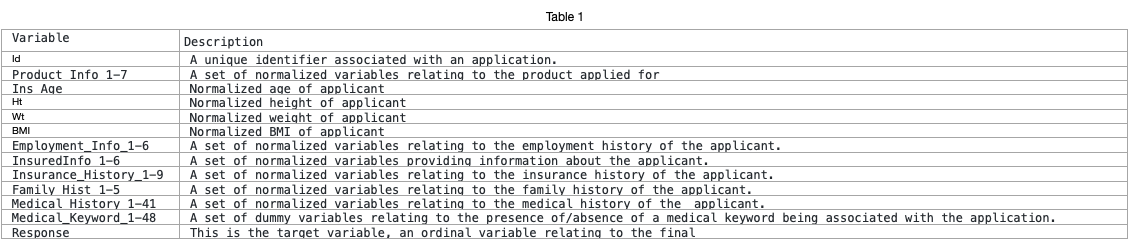

In [1]:
## Import all the libraries required
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
## read the data
insurance=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/insurance_data.csv")

In [3]:
insurance.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582

#### Observations
- Most of the columns are numerical and some are not.
- From mean and median looked like most of these are not very skewed
- Presence of Identifier


#### What to do next
- Datatypes are checked and non numerical datatypes are encoded
- Columns with more than 50% of records as missing(NaN) are removed
- Columns with 0 variance(constant values) are removed
- NaN values are replaced with 0
- Identifier column is removed



In [4]:
insurance.columns.to_series().groupby(insurance.dtypes).groups

{dtype('int64'): Index(['Id', 'Product_Info_1', 'Product_Info_3', 'Product_Info_5',
        'Product_Info_6', 'Product_Info_7', 'Employment_Info_2',
        'Employment_Info_3', 'Employment_Info_5', 'InsuredInfo_1',
        ...
        'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
        'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
        'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
        'Response'],
       dtype='object', length=109),
 dtype('float64'): Index(['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1',
        'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5',
        'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
        'Medical_History_1', 'Medical_History_10', 'Medical_History_15',
        'Medical_History_24', 'Medical_History_32'],
       dtype='object'),
 dtype('O'): Index(['Product_Info_2'], dtype='object')}

In [5]:
## encoding product_info_2 since its non numeric
insurance=pd.get_dummies(insurance,columns=['Product_Info_2'],drop_first=True)

In [6]:
## number of nulls across various fields

pd.DataFrame((insurance.isnull().sum())/len(insurance)*100).sort_values(by=0)


,0
Id,0.000000
Medical_Keyword_15,0.000000
Medical_Keyword_16,0.000000
Medical_Keyword_17,0.000000
Medical_Keyword_18,0.000000
Medical_Keyword_19,0.000000
Medical_Keyword_20,0.000000
Medical_Keyword_14,0.000000
Medical_Keyword_21,0.000000
Medical_Keyword_23,0.000000


In [7]:
## remove columns with more than 50% NULL
insurance=insurance.dropna(axis=1,thresh=(0.5*len(insurance)))

In [8]:
## dropping the column "Id"
insurance.drop(['Id'],axis=1,inplace=True)

In [9]:
## remove columns with std dev as 0
drop_cols=[]
for cols in insurance.columns:
    if insurance[cols].std()==0:
        drop_cols.append(cols)
print("Number of constant columns to be dropped: ", len(drop_cols))
print(drop_cols)
insurance.drop(drop_cols,axis=1, inplace = True)

Number of constant columns to be dropped:  0
[]


In [10]:
## fill missing values
## imputing nulls as 0 since NULL means, these values are not available
insurance.fillna(0,inplace=True)

In [11]:
## check again for missing values
## number of nulls across various fields
pd.DataFrame(insurance.isnull().sum()).sort_values(by=0)


,0
Product_Info_1,0
Medical_Keyword_30,0
Medical_Keyword_29,0
Medical_Keyword_28,0
Medical_Keyword_27,0
Medical_Keyword_26,0
Medical_Keyword_25,0
Medical_Keyword_24,0
Medical_Keyword_23,0
Medical_Keyword_22,0


In [12]:
## Cardinality check
pd.DataFrame(insurance.apply(pd.Series.nunique)).sort_values(by=0)

,0
Product_Info_1,2
Medical_Keyword_30,2
Medical_Keyword_29,2
Medical_Keyword_28,2
Medical_Keyword_27,2
Medical_Keyword_26,2
Medical_Keyword_25,2
Medical_Keyword_24,2
Medical_Keyword_23,2
Medical_Keyword_22,2


### Observations:
- Product_Info_2 is categorical and is encoded to numerical
- More than 50% NULLs are removed, rest are replaced with 0
- No column has std dev of 0, that is no column has constant values
- Identifier column is dropped

### Next steps: EDA
- Distribution of target variable
- Medical_History_1 and 2 have mean and median significantly different.Distribution of Medical_History_1,Medical_History_2,Age, BMI, Weight and Height. 

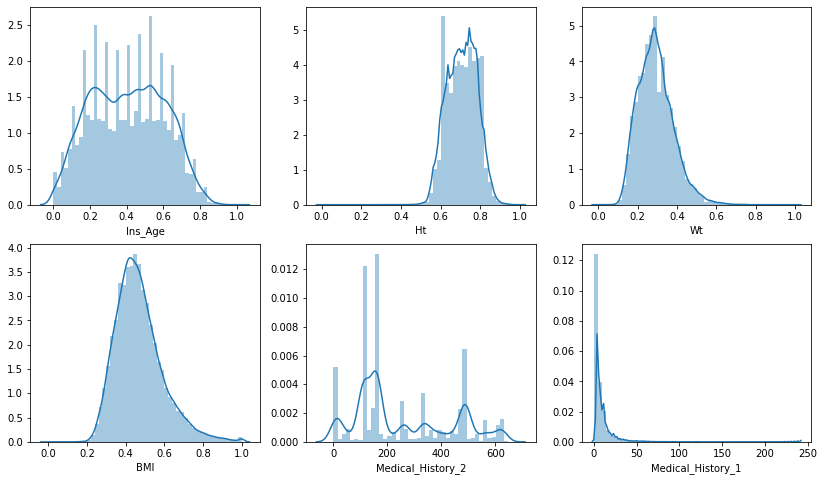

In [13]:
fig = plt.figure(figsize=(14,8))
for i, col in enumerate(['Ins_Age', 'Ht', 'Wt', 'BMI','Medical_History_2','Medical_History_1']):
    ax=fig.add_subplot(2, 3, i+1)
    sns.distplot(insurance[col])
#plt.tight_layout()

###  Medical History 1 and Medical History 2 are not normal distribution, removing these two columns. Others are not very skewed and can be taken as is

In [14]:
insurance.drop(['Medical_History_1','Medical_History_2'],axis=1,inplace=True)

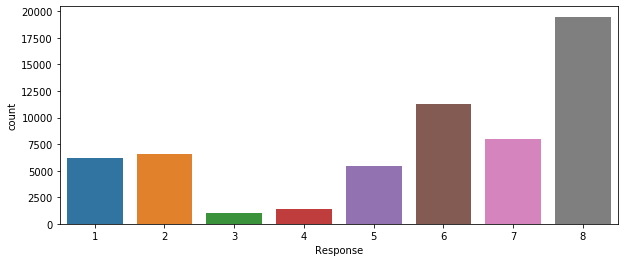

In [15]:
# Response plot
fig = plt.figure(figsize=(10,4))
sns.countplot(insurance['Response'])

In [16]:
insurance['Response'].value_counts()/len(insurance)*100

8    32.820262
6    18.916825
7    13.517792
2    11.033832
1    10.452838
5     9.147707
4     2.404810
3     1.705933
Name: Response, dtype: float64

### Response has imbalanced classes. We might need to resample if the model is not able to take care of this imbalance

In [17]:
## Assigning X and Y
X=insurance.drop(['Response'],axis=1)
Y=insurance['Response']

In [18]:
X.shape

(59381, 135)

In [19]:
Y.shape

(59381,)

### The data is split in train and test data, stratify option is chosen since we have imbalanced target variable

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y,random_state=1)

In [21]:

sc = StandardScaler()
sc.fit(X_train)
X_train =sc.transform(X_train)
X_test=sc.transform(X_test)

In [22]:
print(X_train.shape)
print(X_test.shape)


(44535, 135)
(14846, 135)


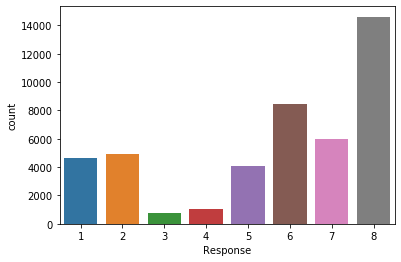

In [23]:
sns.countplot(y_train)

### The Random Forest is initiated and used for training. Also, class_weight is chosen as balanced so the model tries to take care of the imbalance

In [24]:
rf = RandomForestClassifier(class_weight="balanced",random_state=20)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [25]:

logreg = LogisticRegression(random_state=25)
logreg.fit(X_train,y_train)

/Users/Dexter/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=25, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predictions using the trained model

In [26]:
predictions_rf = rf.predict(X_test).astype(np.int64)
predictions_lr = logreg.predict(X_test).astype(np.int64)
print(predictions_rf[:20] ,"\n",predictions_lr[:20])

[7 1 6 7 5 8 5 8 6 8 7 7 6 2 6 5 2 5 7 6] 
 [7 1 6 1 5 8 5 8 1 8 6 8 6 5 2 5 2 5 7 6]


### Validation of model

In [27]:
## Confusion Matrix

print(confusion_matrix(y_test,predictions_rf))
print(confusion_matrix(y_test,predictions_lr))


[[ 313  185    0    3  129  392  145  385]
 [ 158  391    3    6  198  386  132  364]
 [   9   13    7    4   69  117    5   29]
 [   8    3    0   21    2  157   22  144]
 [  43  116    0    2  722  279   56  140]
 [  96  104    2   22  142 1436  278  728]
 [  42   17    1    1   15  484  627  820]
 [  17    8    0   10   16  345  144 4333]]
[[ 403  237   11   15  114  323  122  327]
 [ 223  395   14   12  222  362  107  303]
 [  14   24   17   10   30  123    3   32]
 [   8    1    5   49    3  156    9  126]
 [  97  169    5    2  436  338   93  218]
 [ 188  194    3   35  113 1194  292  789]
 [  71   55    1   11   34  425  503  907]
 [  45   29    0   28   22  360  100 4289]]


In [28]:
## Classification Report

print(classification_report(y_test,predictions_rf))
print(classification_report(y_test,predictions_lr))


              precision    recall  f1-score   support

           1       0.46      0.20      0.28      1552
           2       0.47      0.24      0.32      1638
           3       0.54      0.03      0.05       253
           4       0.30      0.06      0.10       357
           5       0.56      0.53      0.54      1358
           6       0.40      0.51      0.45      2808
           7       0.44      0.31      0.37      2007
           8       0.62      0.89      0.73      4873

    accuracy                           0.53     14846
   macro avg       0.47      0.35      0.36     14846
weighted avg       0.51      0.53      0.49     14846

              precision    recall  f1-score   support

           1       0.38      0.26      0.31      1552
           2       0.36      0.24      0.29      1638
           3       0.30      0.07      0.11       253
           4       0.30      0.14      0.19       357
           5       0.45      0.32      0.37      1358
           6       0.36 

In [29]:

print('Accuracy score on test data with Random Forest is:', accuracy_score(y_test,predictions_rf))
print('Accuracy score on test data with Logistic Regression is:', accuracy_score(y_test,predictions_lr))

Accuracy score on test data with Random Forest is: 0.5287619560824465
Accuracy score on test data with Logistic Regression is: 0.4907719250976694


### Random Forest is working better than the Logistic Regression, choosing the Random Forest as the model here 

### Low accuracy and Recall means the model is not able to take care of class imbalance. Class imbalance is taken care of in below segment.

### Imbalance class Treatment
- Used Combine method (oversampling and undersampling) to get the dataset balanced and check the accuarcy and recall value we are getting

In [30]:

smote_tomek = SMOTETomek(random_state=1)
X_resampled_to, y_resampled_to = smote_tomek.fit_resample(X_train, y_train)


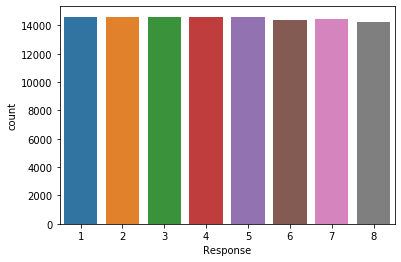

In [31]:
sns.countplot(y_resampled_to)

###### The classes look balanced now, lets check if this improves the accuracy/recall value

In [32]:
rf = RandomForestClassifier(random_state=100)
rf.fit(X_resampled_to, y_resampled_to)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [33]:

logreg = LogisticRegression(random_state=250)
logreg.fit(X_resampled_to, y_resampled_to)

/Users/Dexter/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=250, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
predictions_rf = rf.predict(X_test).astype(np.int64)
predictions_lr = logreg.predict(X_test).astype(np.int64)
print(predictions_rf[:20] ,"\n",predictions_lr[:20])

[7 2 6 2 5 8 5 8 6 8 7 7 3 1 6 5 2 5 7 7] 
 [7 1 4 1 5 8 5 8 4 2 6 7 3 5 2 5 2 5 7 6]


In [35]:

print('Accuracy score on test data with Random Forest is:', accuracy_score(y_test,predictions_rf))
print('Accuracy score on test data with Logistic Regression is:', accuracy_score(y_test,predictions_lr))

Accuracy score on test data with Random Forest is: 0.5157618213660246
Accuracy score on test data with Logistic Regression is: 0.4250303111949347


### With treatment of Unbalanced dataset, we are getting similar accuracy as we were getting without using it. Possibly the way to deal with this imbalance is getting some more data on the minority class

## Hyperparameter Tuning

In [36]:
model=RandomForestClassifier(random_state=550)

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=550,
                                

In [37]:
predictions_gs=grid_search_forest.predict(X_test)

In [38]:

print('Accuracy score on test data with Random Forest is:', accuracy_score(y_test,predictions_gs))


Accuracy score on test data with Random Forest is: 0.5122591943957968


In [39]:
print(classification_report(y_test,predictions_gs))

              precision    recall  f1-score   support

           1       0.34      0.23      0.27      1552
           2       0.39      0.25      0.30      1638
           3       0.32      0.05      0.08       253
           4       0.35      0.13      0.19       357
           5       0.54      0.47      0.50      1358
           6       0.39      0.47      0.43      2808
           7       0.41      0.32      0.36      2007
           8       0.65      0.86      0.74      4873

    accuracy                           0.51     14846
   macro avg       0.42      0.35      0.36     14846
weighted avg       0.48      0.51      0.49     14846



In [40]:
print(confusion_matrix(y_test,predictions_gs))

[[ 351  223    3    7  128  350  152  338]
 [ 235  409    4   10  181  344  150  305]
 [  23   23   12    6   63   92    6   28]
 [  13    8    1   45    3  134   25  128]
 [  83  153   11    3  640  280   67  121]
 [ 194  155    2   25  138 1311  334  649]
 [  76   56    1    4   28  460  650  732]
 [  50   30    3   27   14  357  205 4187]]


### Post hyperparameter tuning, we are getting similar accuracy and recall.

### Trying to use PCA to reduce dimensionality

In [41]:
X=sc.transform(X)

In [42]:
## Using PCA for reducing the dimensions. It has 126 columns as of now.
pca=PCA(0.95).fit(X)

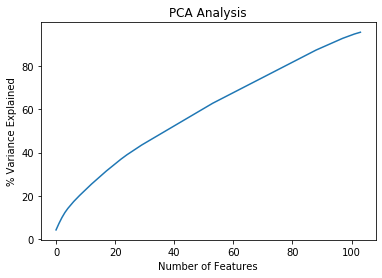

In [43]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [44]:
print('%d components explain 99%% of the variation in data' % pca.n_components_)

104 components explain 99% of the variation in data


In [45]:
pca = PCA(n_components=23, random_state = 0)
pca.fit(X)
X = pca.transform(X)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y,random_state=1)

(59381, 23)


In [46]:
rf = RandomForestClassifier(random_state=300)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=300,
                       verbose=0, warm_start=False)

In [47]:
predictions_rf = rf.predict(X_test).astype(np.int64)
print(predictions_rf[:20])

[7 1 6 1 6 8 8 8 6 8 7 6 6 1 6 5 2 5 7 8]


In [48]:

print('Accuracy score on test data with Random Forest is:', accuracy_score(y_test,predictions_rf))

Accuracy score on test data with Random Forest is: 0.4471911626027213


In [49]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           1       0.34      0.26      0.29      1552
           2       0.30      0.21      0.25      1638
           3       0.29      0.01      0.02       253
           4       0.17      0.00      0.01       357
           5       0.42      0.20      0.27      1358
           6       0.32      0.40      0.36      2808
           7       0.31      0.16      0.22      2007
           8       0.57      0.86      0.68      4873

    accuracy                           0.45     14846
   macro avg       0.34      0.26      0.26     14846
weighted avg       0.41      0.45      0.40     14846



### The accuracy achieved is lower than what we got without using the PCA, so we will conclude for not using it.  Also, class 3,4,5 did not do well